# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |

# Solve Ordinary Differential Equations

## Ordinary differential equation

In mathematics, an ordinary differential equation (ODE) is a differential equation containing one or more functions of one independent variable and the derivatives of those functions.

Given F, a function of x, y, and derivatives of y. Then an equation of the form
\begin{equation}
    F ( x , y , y ′ , … , y^{ (n − 1) } ) = y^{ ( n )} 
\end{equation}

is called an explicit ordinary differential equation of order n.

More generally, an implicit ordinary differential equation of order n takes the form:

\begin{equation}
    F ( x , y , y ′ , y ″ ,   … ,   y^{( n )} ) = 0 
\end{equation}
More generally, it can be ${\bf F}(x,y,z,..,y',z',...,y^{(2)}...)=0$.
As long as there is only one independent variable (x), which means when
x is given, all other quantities are fixed.

It contian only one independent variable (here x). 
If there are more than one independent varialbe, it is partial differential equation:
\begin{equation}
\frac{\partial f(x,y)}{\partial x}+\frac{\partial f(x,y)}{\partial y}=0
\end{equation}

## Equation orders

First-order (the degree of the derivative on the left side, y on the right side can be any order):
\begin{equation}
\frac{dy}{dt}=f(t,y)
\end{equation}
e.g.
\begin{equation}
\frac{dy}{dt}=t^3*y^4+y^2+t
\end{equation}
Second order: (the first derivative on the right side can be any power)
\begin{equation}
\frac{d^2y}{dt^2}+\lambda \frac{dy}{dt}=f(t,\frac{dy}{dt},y)
\end{equation}
e.g.
\begin{equation}
\frac{d^2y}{dt^2}+\lambda \frac{dy}{dt}= 5 t^3\left(\frac{dy}{dt}\right)^5+t^7*y
\end{equation}
t is the independent variable and y is the dependent variable. We are free to vary t and then
y is determined. Although here we use t to represent the independent varialble, it can be any symbol (e.g. f(y)).



## Linear and Nonlinear equations
Only the first power of y or $d^n y/dt$ appears, e.g.:
\begin{equation}
\frac{dy}{dt}=g(t)^5y(t)
\end{equation}
If $y_{1}(t)$ and $y_{1}(t)$ are two solutions, $\alpha y_{1}(t)+\beta y_{2}(t)$ is also the solution.

Non-linear equation:
\begin{equation}
\frac{dy}{dt}=\lambda y(t)-\lambda^2 y^2(t)
\end{equation}

## Initial and boundary conditions
A first-order differential equation contains one arbitrary constant,
and a second-order ODE contians two constants, and so on.  
Additional condition is needed: either with initial condition or boundary condition

## A general form
Express ODEs of any order as N first-order ODEs y$^0$, ... y$^{N-1}$.
\begin{eqnarray}
\frac{dy_0}{dt}&=&f_0(t,\bf{y})\\
\frac{dy_1}{dt}&=&f_1(t,\bf{y})\\
...\\
\frac{dy_{N-1}}{dt}&=&f_{N-1}(t,\bf{y})
\end{eqnarray}
Vector form
\begin{equation}
\frac{d{\bf y}(t)}{dt}=\bf{f(t,\bf{y})}
\end{equation}
where ${\bf y}(t)=(y_0, ..., y_{N-1})$, ${\bf{f(t)}}=(f_0, ..., f_{N-1})$.
The right hand does not contain derivative.

## Numerical Algorithm

The rocket follows
\begin{equation}
\frac{d^2 {\bf x} }{dt}=f({\bf x})
\end{equation}
where $f({\bf x})=-GM{\bf r}/r^3 $.

In two dimensional space, we can write it as
\begin{align*}
\frac{d x}{dt} &= v_{x}\\
\frac{d v_{x}}{dt} &= -\frac{GM}{r^3}x\\
\frac{d y}{dt} &= v_{y}\\
\frac{d v_{y}}{dt} &= -\frac{GM}{r^3}y
\end{align*}
where $r=\sqrt{x^2+y^2}$

### 1. Euler's Rule
\begin{equation}
\frac{d{\bf y}(t)}{dt}\simeq\frac{{\bf y}(t_{n+1})-{\bf y}(t_{n})}{h}={\bf f}(t,\bf{y})
\end{equation}
So
\begin{equation}
{\bf y}_{n+1}={\bf y}_{n}+h {\bf f}(t_n, {\bf y}_{n})
\end{equation}
The error is $O(h^2)$.

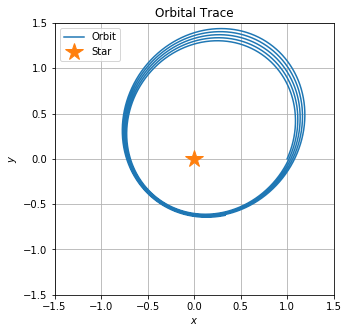

In [4]:
# So we have y[0]=x, y[1]=v_{x}, y[2]=y, y[3]=v_{y}

import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
tend=5*2.*np.pi
h=0.001
y=[1.,.4,0,.9]
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]            # please finish this line
    f[3]=-G*M/r/r/r*y[2] # please finish this line
    return f
    
def eu(t, h, y, neq):
    """
    Advance the solution by one step, h.
    neq is the nth equation of y[]
    """
    fv=f(t, y)
#     for i in range(neq):
#         #please finish this line with Euler method
#         y[i] += h*fv[i]
    y += h*f(t,y)
    return y

xp=[]
yp=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = eu(t, h, y, 4) # please finish this line
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    t = t+h

plt.figure(figsize=(5,5))
plt.title("Orbital Trace")
plt.xlim(-1.5,1.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-1.5,1.5)
plt.plot(xp,yp, label='Orbit')
plt.plot(0,0, '*', markersize=18, label='Star')
plt.grid()
plt.legend(loc="best")
plt.show()

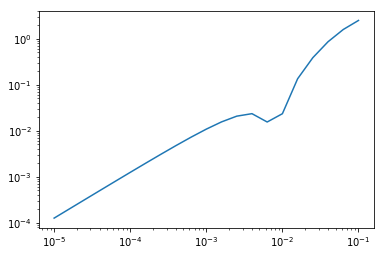

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def eu(t, h, y, n):
    fv=f(t, y)
    for i in range(n):
        y[i]+=fv[i]*h
    return y

ha=[]
err=[]
for h in 10.**np.arange(-1.,-5.2,-0.2):
    ha=np.append(ha,h)
    G=1.
    M=1.
    tend=2.*np.pi
    y=[1.,0.,0.,1.]
    t=0
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = eu(t,h,y,4)
        t = t+h
    err=np.append(err,abs(y[0]-1.))

plt.plot(ha,err)
plt.xscale('log')
plt.yscale('log')
plt.show()

### 2. Runge-Kutta Rule

Based on integral
\begin{equation}
{\bf y}(t)=\int {\bf f}(t,y)dt
\end{equation}
So
\begin{equation}
{\bf y}_{n+1}={\bf y}_{n}+\int_{t_{n}}^{t_{n+1}}{\bf f}(t,y)dt
\end{equation}

RK 2 is
\begin{equation}
{\bf y}_{n+1}\simeq {\bf y}_{n}+{\bf f}(t_{n+1/2},y_{n+1/2})h+O(h^3)
\end{equation}
and ${\bf f}(t_{n+1/2},y_{n+1/2})$ is derived with Euler method.
\begin{eqnarray}
{\bf y}_{n+1}&\simeq &{\bf y}_{n}+{\bf k_{2}}\\
{\bf k_{2}}&=&h {\bf f}(t_{n}+h/2,{\bf y}_{n}+\frac{{\bf k_{1}}}{2})\qquad {\bf k}_{1}=h{\bf f}(t_n,{\bf y}_{n})
\end{eqnarray}

RK 4 is
\begin{eqnarray}
{\bf y}_{n+1}&\simeq &{\bf y}_{n}+\frac{1}{6}({\bf k_{1}}+2{\bf k_{2}}+2{\bf k_{3}}+{\bf k_{4}})\\
{\bf k}_{1}&=&h{\bf f}(t_n,{\bf y}_{n})\\
{\bf k_{2}}&=&h {\bf f}(t_{n}+h/2,{\bf y}_{n}+\frac{{\bf k_{1}}}{2})\\
{\bf k_{3}}&=&h {\bf f}(t_{n}+h/2,{\bf y}_{n}+\frac{{\bf k_{2}}}{2})\\
{\bf k_{4}}&=&h {\bf f}(t_{n}+h,{\bf y}_{n}+{\bf k_{3}})
\end{eqnarray}

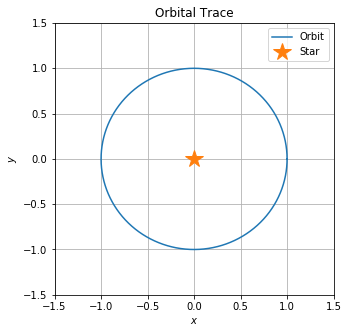

In [4]:
import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
tend=2.*np.pi
h=0.001
y=[1.,0.,0.,1.]
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def rk4(t, h, y):
#     k1 = np.zeros(n)
#     k2 = np.zeros(n)
#     k3 = np.zeros(n)
#     k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)     # please finish this line
    k4=h*f(t+h,y+k3)             # please finish this line
    y+=(1./6.)*(k1+2*k2+2*k3+k4) # please finish this line
    return y

xp=[]
yp=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    t = t+h

plt.figure(figsize=(5,5))
plt.title("Orbital Trace")
plt.xlim(-1.5,1.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-1.5,1.5)
plt.plot(xp,yp, label='Orbit')
plt.plot(0,0, '*', markersize=18, label='Star')
plt.grid()
plt.legend(loc="best")
plt.show()

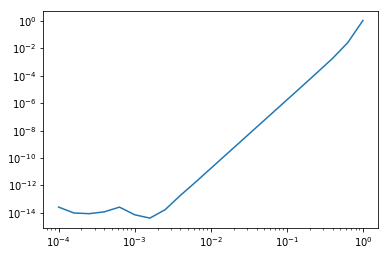

In [5]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ha=[]
err=[]
for h in 10.**np.arange(0.,-4.2,-0.2):
    ha=np.append(ha,h)
    G=1.
    M=1.
    tend=2.*np.pi
    y=[1.,0.,0.,1.]
    t=0
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = rk4(t,h,y,4)
        t = t+h
    err=np.append(err,abs(y[0]-1.))

plt.plot(ha,err)
plt.xscale('log')
plt.yscale('log')
plt.show()

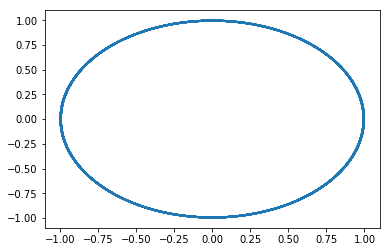

In [4]:
import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
tend=2.*np.pi*50.
h=0.2
y=[1.,0.,0.,1.]
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

xp=[]
yp=[]
ta=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,4)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    ta=np.append(ta,t)
    t = t+h

plt.plot(xp,yp)
plt.show()

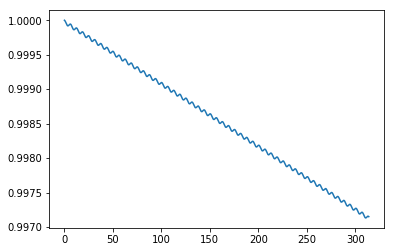

In [9]:
plt.plot(ta,np.sqrt(xp*xp+yp*yp))
plt.show()

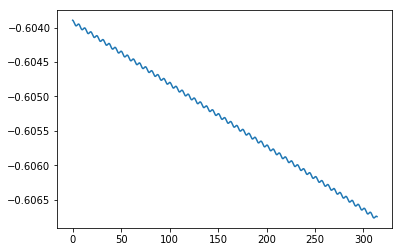

In [10]:
# plot the total energy
plt.plot(ta,0.5*(y[1]*y[1]+y[2]*y[2])-1./np.sqrt(xp*xp+yp*yp))
plt.show()

### 3. Leap frog (Optional)
Drift-kick-drift method

\begin{eqnarray}
\frac{d x}{dt}=v_{x}\\
\frac{d v_{x}}{dt}=-\frac{GM}{r^3}x\\
\frac{d y}{dt}=v_{y}\\
\frac{d v_{y}}{dt}=-\frac{GM}{r^3}y
\end{eqnarray}
into
step 1:
\begin{eqnarray}
\frac{d x}{dt}&=&v_{x}\qquad half \; step\\
\frac{d y}{dt}&=&v_{y}\\
\end{eqnarray}
step 2: (use the new half step x and y)
\begin{eqnarray}
\frac{d v_{x}}{dt}&=&-\frac{GM}{r^3}x\quad full\; step\\
\frac{d v_{y}}{dt}=-\frac{GM}{r^3}y
\end{eqnarray}
Step 3: (use the new $v_{x}$ and $v_{y}$)
\begin{eqnarray}
\frac{d x}{dt}&=&v_{x}\qquad half \; step\\
\frac{d y}{dt}&=&v_{y}
\end{eqnarray}

If we write the equations explicitly, we have 
step 1:
\begin{eqnarray}
x_{n+1/2}&=&x_{n}+v_{x,n}dt/2\qquad half \; step\\
y_{n+1/2}&=&y_{n}+v_{y,n}dt/2\\
\end{eqnarray}
step 2: (use the new half step x and y)
\begin{eqnarray}
v_{x,n+1}&=&v_{x,n}-\frac{GM}{r_{n+1/2}^3}x_{n+1/2}dt\quad full\; step\\
v_{y,n+1}&=&v_{y,n}-\frac{GM}{r_{n+1/2}^3}y_{n+1/2}dt
\end{eqnarray}
Step 3: (use the new $v_{x}$ and $v_{y}$)
\begin{eqnarray}
x_{n+1}&=&x_{n+1/2}+v_{x,n+1}dt/2\qquad half \; step\\
y_{n+1}&=&y_{n+1/2}+v_{y,n+1}dt/2
\end{eqnarray}

### Symplectic Method:

Symplectic integrators are designed for the numerical soluton of Hamilton's equations
\begin{eqnarray}
\dot{p}=-\frac{\partial H}{\partial q}\\
\dot{q}=\frac{\partial H}{\partial p}
\end{eqnarray}
(q,p) are called canonical coordinates. 

The time evolution of Hamilton's equations conserves the dp^dq (Liouville's theorem).
A numerical scheme is symplectic if it also conserves this quantity. 

From Sebastion Pingen:
![iap.tu-darmstadt](http://www.iap.tu-darmstadt.de/typo3temp/pics/947b4bb383.png)

The transformation from step n to step n+1 is
\begin{equation}
\left[ \begin{array}{c} x_{n+1}\\p_{n+1} \end{array} \right] = J \left[ \begin{array}{c} x_{n}\\p_{n} \end{array} \right]
\end{equation}
An area at n step is dA=dxdp, and the area at n+1 step is dA'=$|\vec{de_{1}}\times \vec{de_{2}}|$
\begin{equation}
\vec{de_{1}}=\left(\frac{\partial x'}{\partial x}\hat{x}+\frac{\partial x'}{\partial p}\hat{p}\right)dx
\end{equation}
\begin{equation}
\vec{de_{2}}=\left(\frac{\partial p'}{\partial x}\hat{x}+\frac{\partial p'}{\partial p}\hat{p}\right)dp
\end{equation}
The vector product can be represented as a determinant

dA'=det J dA

where
\begin{equation}
J=\begin{bmatrix}\frac{\partial x'}{\partial x} & \frac{\partial x'}{\partial p} \\\frac{\partial p'}{\partial x} & \frac{\partial p'}{\partial p} \end{bmatrix}
\end{equation}


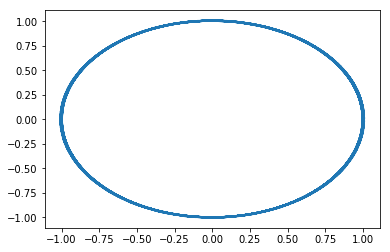

In [11]:
import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
tend=2.*np.pi*50.
h=0.2
y=[1.,0.,0.,1.]
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def lf(t, h, y, n):
    fv=f(t, y)
    for i in [0,2]:
        y[i]+=fv[i]*h/2.
    fv=f(t+0.5*h, y)
    for i in [1,3]:
        y[i]+=fv[i]*h
    fv=f(t+0.5*h, y)
    for i in [0,2]:
        y[i]+=fv[i]*h/2
    return y

xp=[]
yp=[]
ta=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = lf(t,h,y,4)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    ta=np.append(ta,t)
    t = t+h

plt.plot(xp,yp)
plt.show()

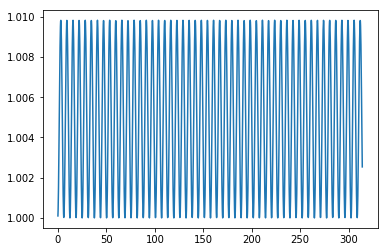

In [12]:
plt.plot(ta,np.sqrt(xp*xp+yp*yp))
plt.show()

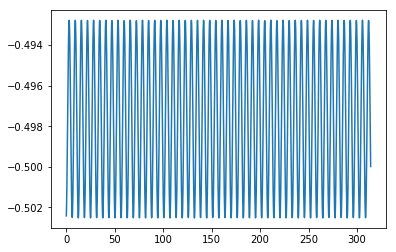

In [13]:
# plot the total energy
plt.plot(ta,1./2.*(y[1]*y[1]+y[3]*y[3])-1./np.sqrt(xp*xp+yp*yp))
plt.show()

# Homework:
# Write your own Runge-Kutta scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0.5. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. 

# CORRECTION: CAN USE CIRCULAR ORBIT W/ v=1/sqrt(2)